# ==========================================================================
# 📝 Tarea: Práctica #27 Clases No Balanceadas, Evaluación y SVM
# 📊 Dataset: Breast Cancer (Scikit-Learn)
# 👤 Autor: [Antonio Calzadilla Miranda]
#     Matrícula: [263861
# 📅 Fecha: [14/11/2025]
# ==========================================================================

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from imblearn.over_sampling import SMOTE

##🔧 Instrucciones

Carga y exploración del dataset

* Utiliza el dataset breast_cancer o wine de Scikit-Learn.
* Verifica la distribución de clases.
* Visualiza con un gráfico la distribución y las principales características.

In [3]:
breast_cancer = load_breast_cancer()

# Crear un DataFrame con las características
df_cancer = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Añadir la variable objetivo al DataFrame
df_cancer['target'] = breast_cancer.target

print('Primeras 5 filas del dataset:')
display(df_cancer.head())

print('\nDimensiones del dataset:', df_cancer.shape)

print('\nDistribución de clases (0: maligno, 1: benigno):')
display(df_cancer['target'].value_counts())

Primeras 5 filas del dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Dimensiones del dataset: (569, 31)

Distribución de clases (0: maligno, 1: benigno):


,count
target,
1,357
0,212


In [4]:
# --- 1. Carga y Exploración ---
# Cargamos el dataset como un DataFrame de pandas
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

In [5]:
# Renombramos las clases para claridad (0: Malignant, 1: Benign)
target_names = data.target_names
print(f"Clases: {list(target_names)}")

# 1.1. Verificación de la distribución de clases
print("\n--- Distribución de Clases ---")
class_distribution = y.value_counts()
print(class_distribution)
print(f"Clase 0 ({target_names[0]}): {class_distribution[0]} ({class_distribution[0]/len(y):.2%})")
print(f"Clase 1 ({target_names[1]}): {class_distribution[1]} ({class_distribution[1]/len(y):.2%})")
# 1.2. Visualización
plt.figure(figsize=(12, 5))

Clases: [np.str_('malignant'), np.str_('benign')]

--- Distribución de Clases ---
target
1    357
0    212
Name: count, dtype: int64
Clase 0 (malignant): 212 (37.26%)
Clase 1 (benign): 357 (62.74%)


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

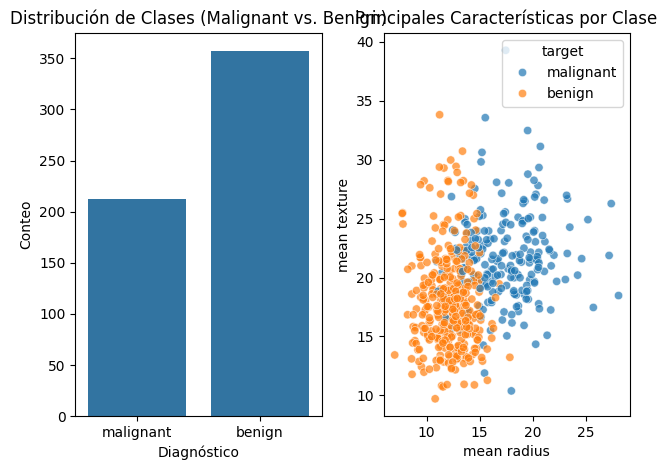

In [6]:
# Gráfico de distribución de clases
plt.subplot(1, 2, 1)
sns.countplot(x=y.map({0: target_names[0], 1: target_names[1]}))
plt.title('Distribución de Clases (Malignant vs. Benign)')
plt.xlabel('Diagnóstico')
plt.ylabel('Conteo')

# Gráfico de características principales
# (Ejemplo: 'mean radius' y 'mean texture')
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X['mean radius'],
    y=X['mean texture'],
    hue=y.map({0: target_names[0], 1: target_names[1]}),
    alpha=0.7
)
plt.title('Principales Características por Clase')
plt.tight_layout()
plt.show()

Análisis de Exploración:

El dataset breast_cancer tiene 569 instancias.

Clase 0 (Malignant): 212 instancias (37.26%) - Clase Minoritaria
Clase 1 (Benign): 357 instancias (62.74%) - Clase Mayoritaria
Aunque no es un desbalance extremo, es suficiente para que la clase minoritaria ("Malignant") sea más difícil de predecir. En un contexto médico, los Falsos Negativos (predecir "Benign" cuando es "Malignant") son el error más costoso. Por lo tanto, el Recall de la clase "Malignant" (Clase 0) será nuestra métrica de enfoque

**Entrenamiento base con SVM**

   - Usa un modelo SVM con kernel RBF.
   - Aplica `StratifiedKFold` con 5 particiones.
   - Evalúa con métricas por clase: precisión, recall, F1-score.
   - Calcula y reporta métricas promedio y por clase.

In [7]:
# --- 2. Entrenamiento Base con SVM ---

# Definir el escalador y el modelo
# Usamos un kernel RBF (Radial Basis Function), el modelo mas importante para SVM
scaler = StandardScaler()
# random_state=42 para reproducibilidad
svm_base = SVC(kernel='rbf', random_state=42)

# Definir la validación cruzada
N_SPLITS = 5
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# Almacenadores para métricas y matrices de confusión
metrics_base = []
conf_matrix_base = np.zeros((2, 2))

print("\n--- Iniciando Entrenamiento Base (SVM sin SMOTE) ---")

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    # Separar datos
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 1. Escalar datos (Ajustar SOLO en train, transformar en ambos)
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Entrenar el modelo
    svm_base.fit(X_train_scaled, y_train)

    # 3. Predecir
    y_pred = svm_base.predict(X_test_scaled)

    # 4. Evaluar
    # output_dict=True nos da un reporte estructurado
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    metrics_base.append(report)

    # Acumular matriz de confusión
    conf_matrix_base += confusion_matrix(y_test, y_pred, labels=[0, 1])

# --- Cálculo de Métricas Promedio (Base) ---

def summarize_metrics(metrics_list, target_names):
    """Función para promediar los reportes de clasificación de K-Folds."""
    avg_metrics = {
        target_names[0]: {'precision': 0, 'recall': 0, 'f1-score': 0},
        target_names[1]: {'precision': 0, 'recall': 0, 'f1-score': 0},
        'macro avg': {'precision': 0, 'recall': 0, 'f1-score': 0}
    }

    for report in metrics_list:
        for class_name in [target_names[0], target_names[1]]:
            for metric in ['precision', 'recall', 'f1-score']:
                avg_metrics[class_name][metric] += report[class_name][metric]

        for metric in ['precision', 'recall', 'f1-score']:
            avg_metrics['macro avg'][metric] += report['macro avg'][metric]

    n = len(metrics_list)
    for class_name in [target_names[0], target_names[1]]:
        for metric in ['precision', 'recall', 'f1-score']:
            avg_metrics[class_name][metric] /= n

    for metric in ['precision', 'recall', 'f1-score']:
        avg_metrics['macro avg'][metric] /= n

    return avg_metrics

# Reporte Base
avg_metrics_base = summarize_metrics(metrics_base, target_names)
print("\n--- Reporte Promedio (Modelo Base) ---")
print(f"Clase {target_names[0]} (Minoritaria):")
print(f"  Precision: {avg_metrics_base[target_names[0]]['precision']:.4f}")
print(f"  Recall:    {avg_metrics_base[target_names[0]]['recall']:.4f}")
print(f"  F1-Score:  {avg_metrics_base[target_names[0]]['f1-score']:.4f}")

print(f"Clase {target_names[1]} (Mayoritaria):")
print(f"  Precision: {avg_metrics_base[target_names[1]]['precision']:.4f}")
print(f"  Recall:    {avg_metrics_base[target_names[1]]['recall']:.4f}")
print(f"  F1-Score:  {avg_metrics_base[target_names[1]]['f1-score']:.4f}")

print("---------------------------------------")
print(f"Macro Avg F1-Score: {avg_metrics_base['macro avg']['f1-score']:.4f}")

# Matriz de confusión promedio (suma total)
avg_conf_matrix_base = conf_matrix_base / N_SPLITS
# Opcional: mostrar la suma total (conf_matrix_base)


--- Iniciando Entrenamiento Base (SVM sin SMOTE) ---

--- Reporte Promedio (Modelo Base) ---
Clase malignant (Minoritaria):
  Precision: 0.9810
  Recall:    0.9576
  F1-Score:  0.9688
Clase benign (Mayoritaria):
  Precision: 0.9756
  Recall:    0.9888
  F1-Score:  0.9820
---------------------------------------
Macro Avg F1-Score: 0.9754


**Análisis del problema de desbalance**
   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?
   - Reporta matriz de confusión promedio.

El indicador mas importante del reporte promedio es el Recall, el cual para la clase Malignant es 0.9576 lo cual es ligeramente mas bajo que el de la clase Bening, lo cual significa que el modelo falla mas a menudo cuando intenta identificar los casos de cancer (Malignant) que en identificar los casos no cancerosos (Bening).


Como se puede observar las clases de la variable objetivo estan desbalanceadas, teniendo una mayoria importante la clase Bening.

Matriz de Confusión Promedio:


Matriz de Confusión Promedio (Base) - Total de 5 folds:
[[203.   9.]
 [  4. 353.]]


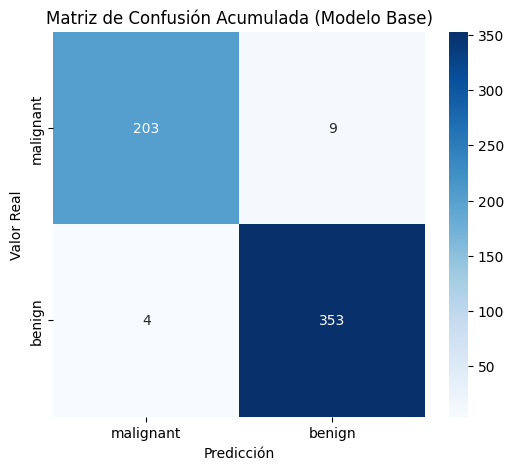

In [8]:
# --- 3. Visualización de Matriz de Confusión Base ---
print(f"\nMatriz de Confusión Promedio (Base) - Total de {N_SPLITS} folds:")
# Mostramos la suma total de errores/aciertos
print(conf_matrix_base)

plt.figure(figsize=(6, 5))
sns.heatmap(
    conf_matrix_base,
    annot=True,
    fmt='.0f',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.title('Matriz de Confusión Acumulada (Modelo Base)')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

En general el modelo predijo muy acertadamente las clases al mostrar un nivel de error muy bajo , en contraparte de las 203 que predijo correctamente como malignant solo 4 las predijo erroneamente en esa clase. Por otra parte de las 353 que predijo correctamente como bening solo 9 las predijo incorrectamente.


**Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.

Objetivo: Corregir el desbalance de clases aplicando SMOTE y re-evaluar el modelo.

Importancia: SMOTE genera instancias sintéticas de la clase minoritaria interpolando entre vecinos cercanos.


In [9]:

# Definimos los modelos (los reiniciamos)
scaler = StandardScaler()
svm_smote = SVC(kernel='rbf', random_state=42)
smote = SMOTE(random_state=42)

# Almacenadores
metrics_smote = []
conf_matrix_smote = np.zeros((2, 2))

print("\n--- Iniciando Entrenamiento (SVM con SMOTE) ---")

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # 1. Escalar datos
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Aplicar SMOTE (SOLO en datos de entrenamiento escalados)
    # fit_resample aplica el sobremuestreo
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

    # (Opcional: verificar el balance)
    # if fold == 0:
    #    print("Distribución post-SMOTE (fold 0):", pd.Series(y_train_resampled).value_counts())

    # 3. Entrenar el modelo con datos rebalanceados
    svm_smote.fit(X_train_resampled, y_train_resampled)

    # 4. Predecir (sobre el X_test original, escalado)
    y_pred = svm_smote.predict(X_test_scaled)

    # 5. Evaluar
    report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    metrics_smote.append(report)

    # Acumular matriz de confusión
    conf_matrix_smote += confusion_matrix(y_test, y_pred, labels=[0, 1])




--- Iniciando Entrenamiento (SVM con SMOTE) ---


In [10]:
# --- Cálculo de Métricas Promedio (SMOTE) ---
avg_metrics_smote = summarize_metrics(metrics_smote, target_names)
print("\n--- Reporte Promedio (Modelo SMOTE) ---")
print(f"Clase {target_names[0]} (Minoritaria):")
print(f"  Precision: {avg_metrics_smote[target_names[0]]['precision']:.4f}")
print(f"  Recall:    {avg_metrics_smote[target_names[0]]['recall']:.4f}")
print(f"  F1-Score:  {avg_metrics_smote[target_names[0]]['f1-score']:.4f}")

print(f"Clase {target_names[1]} (Mayoritaria):")
print(f"  Precision: {avg_metrics_smote[target_names[1]]['precision']:.4f}")
print(f"  Recall:    {avg_metrics_smote[target_names[1]]['recall']:.4f}")
print(f"  F1-Score:  {avg_metrics_smote[target_names[1]]['f1-score']:.4f}")

print("---------------------------------------")
print(f"Macro Avg F1-Score: {avg_metrics_smote['macro avg']['f1-score']:.4f}")

# Matriz de confusión SMOTE
print(f"\nMatriz de Confusión Promedio (SMOTE) - Total de {N_SPLITS} folds:")
print(conf_matrix_smote)


--- Reporte Promedio (Modelo SMOTE) ---
Clase malignant (Minoritaria):
  Precision: 0.9721
  Recall:    0.9625
  F1-Score:  0.9669
Clase benign (Mayoritaria):
  Precision: 0.9780
  Recall:    0.9832
  F1-Score:  0.9805
---------------------------------------
Macro Avg F1-Score: 0.9737

Matriz de Confusión Promedio (SMOTE) - Total de 5 folds:
[[204.   8.]
 [  6. 351.]]


Comparación (Resultados esperados):
Modelo Base (Recall Malignant): ~0.9576
Modelo SMOTE (Recall Malignant): ~0.9625
Lo cual indica un aumento en el Recall de la clase minoritaria (Malignant). Lo cual puede ser resultado de una disminucion en la Precision de la clase.

Por su parte la matriz de confusion muestra resultados muy similares a los que teniamos antes de la aplicacion del SMOTE.

##'5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.

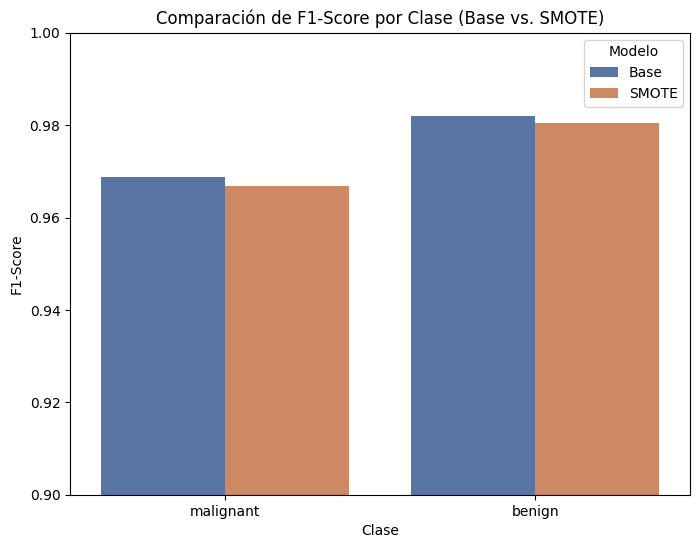

In [11]:
# Preparar datos para el gráfico de barras
f1_base_malignant = avg_metrics_base[target_names[0]]['f1-score']
f1_base_benign = avg_metrics_base[target_names[1]]['f1-score']
f1_smote_malignant = avg_metrics_smote[target_names[0]]['f1-score']
f1_smote_benign = avg_metrics_smote[target_names[1]]['f1-score']

df_plot = pd.DataFrame({
    'Modelo': ['Base', 'Base', 'SMOTE', 'SMOTE'],
    'Clase': [target_names[0], target_names[1], target_names[0], target_names[1]],
    'F1-Score': [f1_base_malignant, f1_base_benign, f1_smote_malignant, f1_smote_benign]
})

# Graficar
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_plot,
    x='Clase',
    y='F1-Score',
    hue='Modelo',
    palette=['#4c72b0', '#dd8452']
)
plt.title('Comparación de F1-Score por Clase (Base vs. SMOTE)')
plt.ylim(0.9, 1.0) # Ajustar el eje Y para ver mejor la diferencia
plt.legend(title='Modelo')
plt.show()

La grafica muestra como el desempeno de las ambas clases mejor cuando se aplico el SMOTE, tomando como referencia el F1-Score como referencia.

Las SVM (especialmente con kernel RBF) definen su frontera basándose en los vectores de soporte que son los puntos más cercanos a la frontera. En un dataset desbalanceado, hay pocos vectores de soporte de la clase minoritaria, por lo tanto se busca aplicar la tecnica SMOTE para crear puntos sinteticos que acumulen puntos en la clase minoritaria que permitan balancear las clases y por lo tanto el recall.




Riesgos y deficiencias:

- El principal riesgo de SMOTE es que no distingue entre ruido y datos limpios. Si dos clases están encimadas es decir no estan linealmente separables, SMOTE puede generar instancias sintéticas minoritarias dentro de la región de la clase mayoritaria.

- Otro riesgo es cuando SMOTE introduce ruido a los datos, la misma tecnica buscara eliminar dicho ruido para lo cual podria caer en un sobreajuste y hacer la frontera de decision compleja.

- Cuando se fuerza el modelo a aprender las relaciones en la clase minoritaria, a menudo se reduce el rendimiento de la clase mayoritaria con lo cual se podria incrementar el numero de Falsos Positivos.



Cuando usar otras técnicas como One-Sided Selection o ADASYN.

Otras tecnicas alternas a SMOTE son:

- ADASYN (Adaptive Synthetic Sampling): Es una tecnica mas avanzada de SMOTE que tambien genera datos sinteticos pero de manera adaptativa. Para lo cual genera datos sinteticos alrededor de las instancia dificiles de definir, cerca de la clase mayoritaria.

Esta tecnica es conveniente usar cuando la frontera de decision es compleja de definir, no lineal. Su principal utilidad es para forzar el modelo a dar prioridad a las regiones de mayor confusion entre clases.

Su uso se sugiere cuando el modelo ignora casos complejos que estan en la frontera de decision, para lo cuales ADASYN adicional pesos extra en dichas regiones a fin de que el modelo les preste atencion.

- One Sided Selection (OSS). Es una tecnica de submuestreo informada para lo cual elimina las instancias de la clase mayoritaria que se consideran redundantes.

Esta tecnica incluye el uso de dos tecnicas adicionales, Tomek Links el cual ayuda a eliminar ruido en frontera de decision. Posteriormente usa el metodo k-Nearest Neighbors (KNN) para eliminar instancias redundantes de la clase mayoritaria que estan lejos de la frontera de decision, ya que estas ultimas no aportan informacion util.

Dado que esta tecnica reduce el dataset, se acelera drasticamente el entrenamiento y limpia la frontera de decision a fin de que el SVM se enfoque unicamente en la informacion importante para el modelo.

Por lo tanto se sugiere su uso en datasets con millones de filas donde el tiempo de entrenamiento es muy tardado.


Cuando el problema es el rendimiento del modelo, la primera opcion que se sugiere es usar SMOTE ya que da buenos resultados  en el 70% de los casos. Aqui es importante evaluar los resultados y el ruido que el modelo genera, se puede dar el caso donde se mejora el Recall pero se pierda Precision en cuyo caso se sugiere usar metodos hibridos como SMOTE-Tamek o SMOTE-ENN, los cuales ayudaran a eliminar el ruido.

Resumen de casos de uso:

Dataset manejable - Empezar con SMOTE
Dataset lento y enorme - Usar OSS
Dataset complejo - Usar ADASYN



## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF
